#                                        Employee Churn Analysis in Python

In [ ]:
#Load the pre-required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from fancyimpute import KNN

In [3]:
#set the working directory
os.chdir("C:/Users/Navaneeth/Desktop/Edwisor/Project/Employee Churn")
# Load the train & test data
train=pd.read_csv("Train_data.csv")
print('The shape of train data is : ',train.shape)
test=pd.read_csv("Test_data.csv")
print("The shape of test data is : ",test.shape)
#Combine or row bind the train & test data
whole_data=train.append(test).reset_index(drop=True)
print("The shape of whole data is : ",whole_data.shape)
#set display option to display all the columns in a dataframe
pd.set_option('display.max_columns', 30)
#display first 10 rows of whole data
whole_data.head(10)

The shape of train data is :  (3333, 21)
The shape of test data is :  (1667, 21)
The shape of whole data is :  (5000, 21)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [8]:
#Check for the variables' datatypes and other info
whole_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
state                            5000 non-null object
account length                   5000 non-null int64
area code                        5000 non-null int64
phone number                     5000 non-null object
international plan               5000 non-null object
voice mail plan                  5000 non-null object
number vmail messages            5000 non-null int64
total day minutes                5000 non-null float64
total day calls                  5000 non-null int64
total day charge                 5000 non-null float64
total eve minutes                5000 non-null float64
total eve calls                  5000 non-null int64
total eve charge                 5000 non-null float64
total night minutes              5000 non-null float64
total night calls                5000 non-null int64
total night charge               5000 non-null float64
total intl minutes           

In [15]:
#check unique values in area code and change it to categorical
print("The unique values present in area code are :",whole_data['area code'].unique())
whole_data['area code']=whole_data['area code'].astype('object')


The unique values present in area code are : [415 408 510]


In [16]:
#Convert 'number customer service calls' variable to bins
whole_data['number customer service calls']= np.where((whole_data['number customer service calls'] >=0) & (whole_data['number customer service calls'] <=3),'Low',np.where((whole_data['number customer service calls'] >3) & (whole_data['number customer service calls'] <=6), 'Moderate','High'))
whole_data['number customer service calls']=whole_data['number customer service calls'].astype('object')
#Check the count of unique values in 'number customer service calls'
whole_data['number customer service calls'].value_counts()

Low         4601
Moderate     382
High          17
Name: number customer service calls, dtype: int64

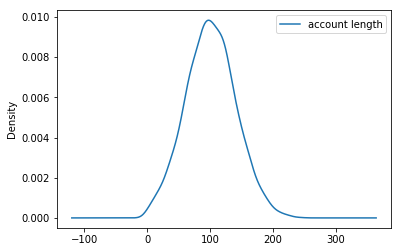

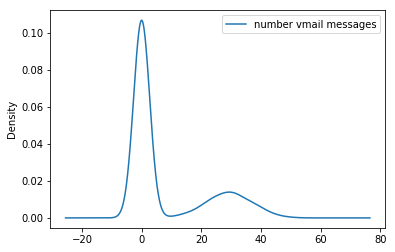

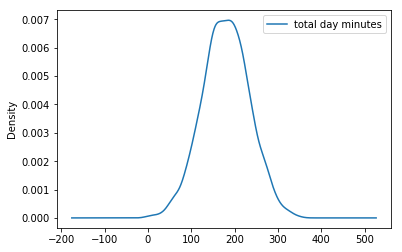

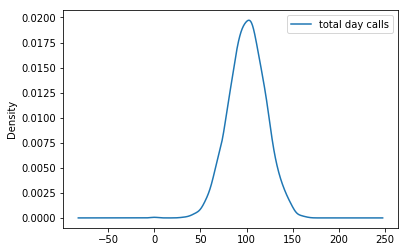

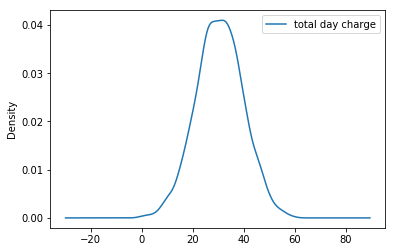

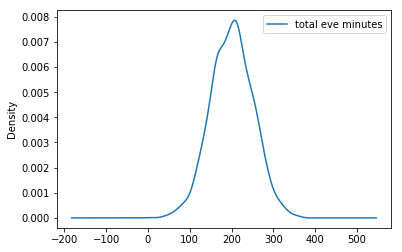

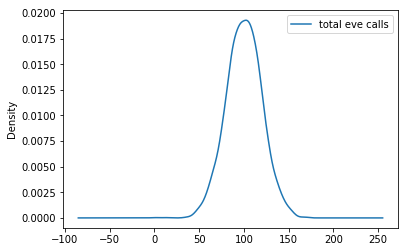

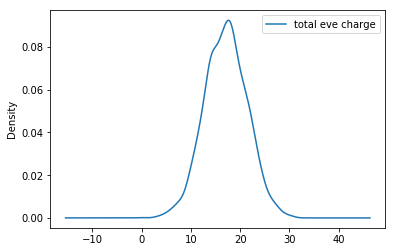

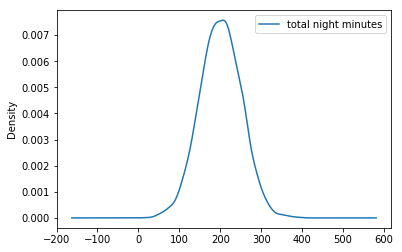

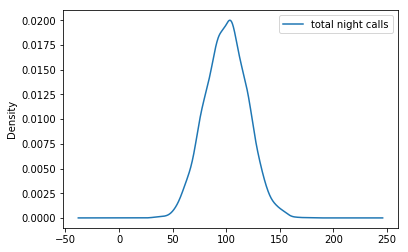

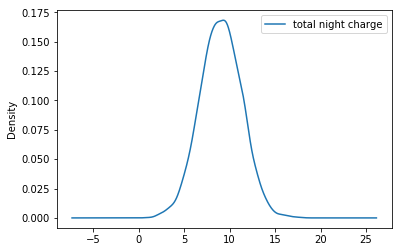

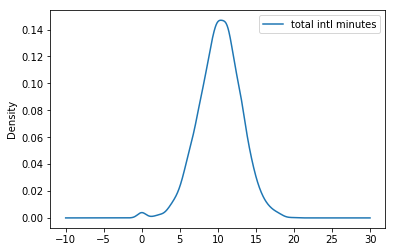

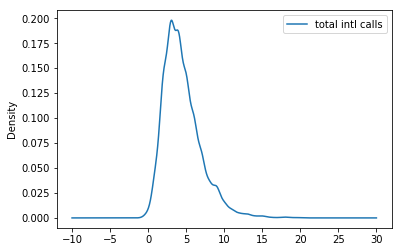

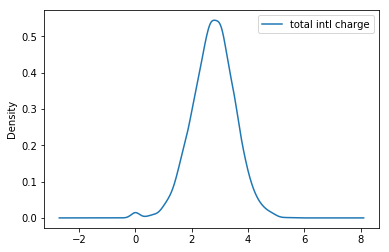

In [3]:
# Density plots 0f numeric predictor variables
names=['account length','number vmail messages','total day minutes','total day calls','total day charge','total eve minutes',
      'total eve calls','total eve charge','total night minutes','total night calls','total night charge','total intl minutes',
      'total intl calls','total intl charge']
for i in names :
    pd.DataFrame(train[i]).plot(kind='density')


Text(0.5,0,'voice mail messages')

<Figure size 720x1080 with 0 Axes>

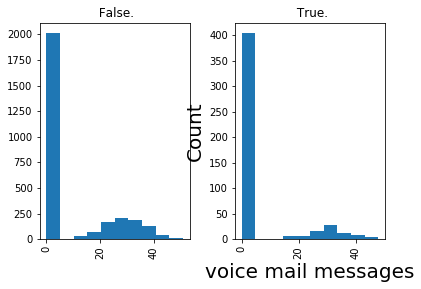

In [16]:
# Plot of Number of voicemail messages by Class

plt.figure(figsize = (10,15))
train.hist('number vmail messages', by = 'Churn')
plt.ylabel('Count', fontsize = 20)
plt.xlabel('voice mail messages', fontsize = 20)
#plt.savefig('voicemail.png')

Text(0.5,0,'Intl calls')

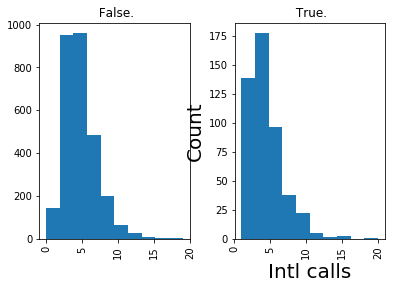

In [15]:
# Plot of Total Intl calls by Class

#plt.figure(figsize = (10,15))
train.hist('total intl calls', by = 'Churn')
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Intl calls', fontsize = 20)
#plt.savefig('total intl calls.png')

Text(0.5,0,'Customer service calls')

<Figure size 720x1080 with 0 Axes>

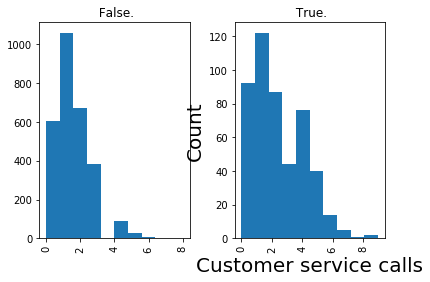

In [18]:
# Plot of Number of customer service calls by Class

plt.figure(figsize = (10,15))
train.hist('number customer service calls', by = 'Churn')
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Customer service calls', fontsize = 20)
#plt.savefig('Customerservivecalls.png')

Text(0,0.5,'Count')

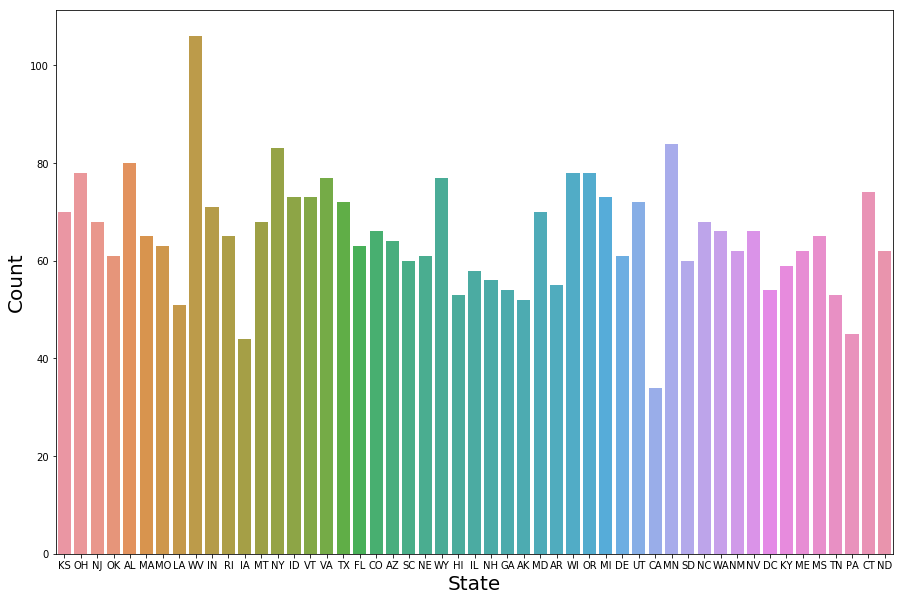

In [4]:
# Plot of States

plt.figure(figsize = (15,10))
sns.countplot('state', data= train)
plt.xlabel('State', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
#plt.savefig('state.png')

In [6]:
# To look at the dataset info
whole_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
state                            5000 non-null object
account length                   5000 non-null int64
area code                        5000 non-null int64
phone number                     5000 non-null object
international plan               5000 non-null object
voice mail plan                  5000 non-null object
number vmail messages            5000 non-null int64
total day minutes                5000 non-null float64
total day calls                  5000 non-null int64
total day charge                 5000 non-null float64
total eve minutes                5000 non-null float64
total eve calls                  5000 non-null int64
total eve charge                 5000 non-null float64
total night minutes              5000 non-null float64
total night calls                5000 non-null int64
total night charge               5000 non-null float64
total intl minutes           

In [17]:
#Dispaly the percentage of train and test data
train_row= train.shape[0]
test_row=test.shape[0]
total_row= train_row+test_row
print("The train data has",train_row,"rows","with % of train data being ",((train_row/total_row)*100))
print("The test data has",test_row,"rows","with % of test data being ",((test_row/total_row)*100))

The train data has 3333 rows with % of train data being  66.66
The test data has 1667 rows with % of test data being  33.339999999999996


In [18]:
#Check the presence of class imbalance in the train data
train_class= train['Churn'] .value_counts()
print(train_class)

 False.    2850
 True.      483
Name: Churn, dtype: int64


# Missing value Analysis

In [19]:
#Store the sum of null values as a dataframe in a new variable
missing_val = pd.DataFrame(whole_data.isnull().sum())
#Reset index
missing_val = missing_val.reset_index()
#Rename variables
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(whole_data))*100
#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
print(missing_val)

                        Variables  Missing_percentage
0                           state                 0.0
1                 total eve calls                 0.0
2   number customer service calls                 0.0
3               total intl charge                 0.0
4                total intl calls                 0.0
5              total intl minutes                 0.0
6              total night charge                 0.0
7               total night calls                 0.0
8             total night minutes                 0.0
9                total eve charge                 0.0
10              total eve minutes                 0.0
11                 account length                 0.0
12               total day charge                 0.0
13                total day calls                 0.0
14              total day minutes                 0.0
15          number vmail messages                 0.0
16                voice mail plan                 0.0
17             international

In [20]:
# Segregate the numeric and categorical variables through loop
cnames=[]
cat_names=[]
for i in range(0,whole_data.shape[1]):
    if(whole_data.iloc[:,i].dtypes == 'object'):
        #print('variable',whole_data.columns[i],'is object datatype')
        cat_names.append(whole_data.columns[i])
    else :
        if(whole_data.iloc[:,i].dtypes == 'int64' or whole_data.iloc[:,i].dtypes =='float64'):
            #print('variable',whole_data.columns[i],'is numeric datatype')
            cnames.append(whole_data.columns[i])
            
            
print("The numeric variables are :",cnames)
print("The categorical variables are :",cat_names)

The numeric variables are : ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge']
The categorical variables are : ['state', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number customer service calls', 'Churn']


# Outlier Analysis & Treatment

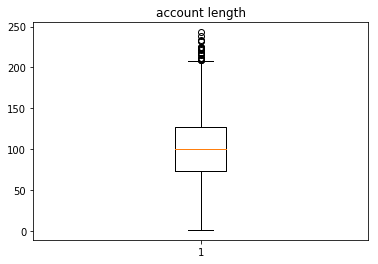

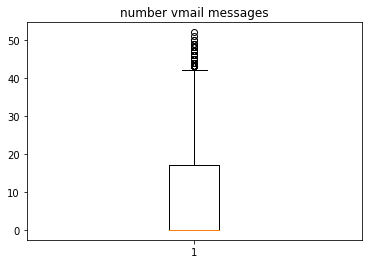

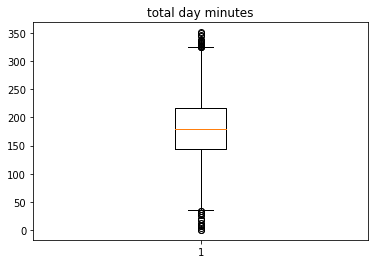

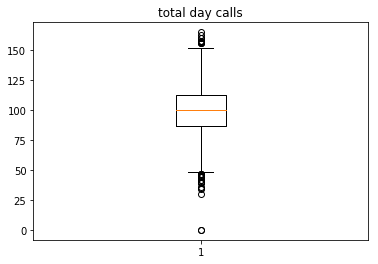

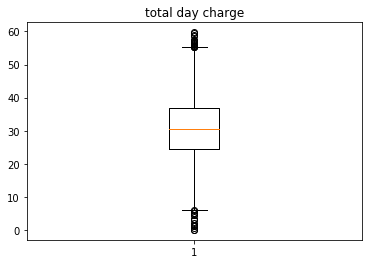

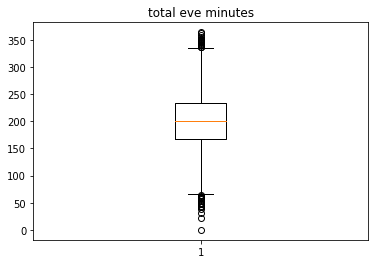

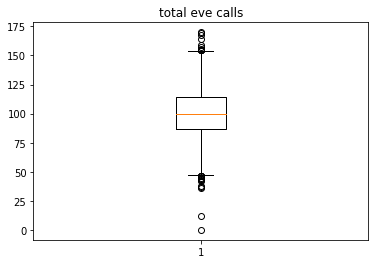

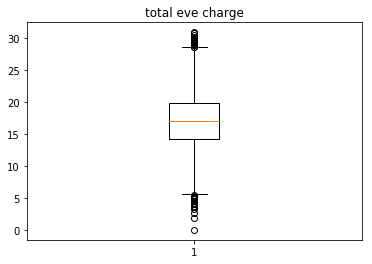

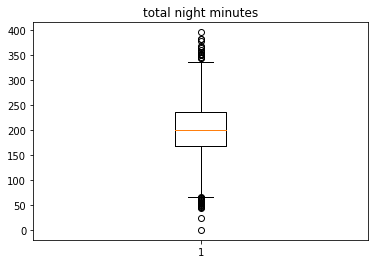

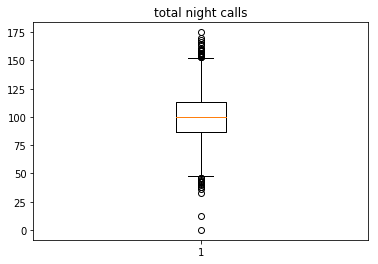

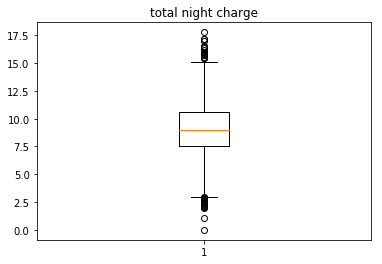

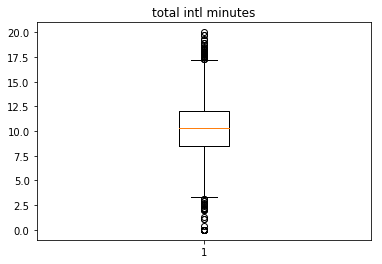

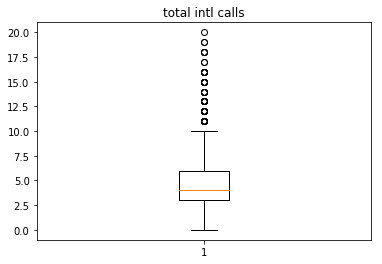

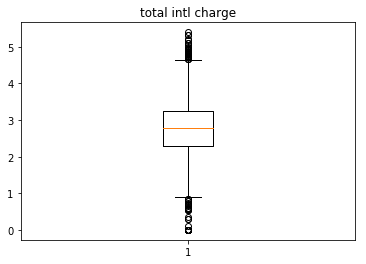

In [21]:
# Plotting boxplot to visulaize outliers for all the numeric variables
%matplotlib inline
for i in cnames :
    plt.figure()
    plt.clf()
    plt.boxplot(whole_data[i])
    plt.title(i)
    #plt.savefig(i)
    plt.show()

In [22]:
# Replacing Outliers with NAs
for i in cnames:
    print(i)
    q75,q25=np.percentile(whole_data.loc[:,i],[75,25])
    iqr= q75-q25
    
    minimum = q25-(1.5*iqr)
    maximum = q75+(1.5*iqr)
    print('Minimum value is',minimum)
    print('Maximum value is',maximum)
     
    whole_data.loc[:,i][whole_data.loc[:,i] < minimum]= np.nan
    whole_data.loc[:,i][whole_data.loc[:,i] > maximum]= np.nan

account length
Minimum value is -8.0
Maximum value is 208.0
number vmail messages
Minimum value is -25.5
Maximum value is 42.5
total day minutes
Minimum value is 34.94999999999999
Maximum value is 324.95
total day calls
Minimum value is 48.0
Maximum value is 152.0
total day charge


C:\Users\Navaneeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Navaneeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


Minimum value is 5.949999999999999
Maximum value is 55.230000000000004
total eve minutes
Minimum value is 64.78750000000001
Maximum value is 335.6875
total eve calls
Minimum value is 46.5
Maximum value is 154.5
total eve charge
Minimum value is 5.5000000000000036
Maximum value is 28.539999999999996
total night minutes
Minimum value is 65.20000000000003
Maximum value is 336.4
total night calls
Minimum value is 48.0
Maximum value is 152.0
total night charge
Minimum value is 2.9349999999999987
Maximum value is 15.135000000000002
total intl minutes
Minimum value is 3.25
Maximum value is 17.25
total intl calls
Minimum value is -1.5
Maximum value is 10.5
total intl charge
Minimum value is 0.8899999999999992
Maximum value is 4.65


In [23]:
# Find the percentage of Outliers by using a function
def outlier_percentage():
    Outlier_values= pd.DataFrame(whole_data.isnull().sum())
    #Reset index
    Outlier_values= Outlier_values.reset_index()
    #Rename variable
    Outlier_values= Outlier_values.rename(columns = {'index': 'Variables', 0: 'Outlier Percentage'})
    #Calculate percentage
    Outlier_values['Outlier Percentage'] = (Outlier_values['Outlier Percentage']/len(whole_data))*100
    #descending order
    Outlier_values= Outlier_values.sort_values('Outlier Percentage', ascending = False).reset_index(drop = True)
    return(print(Outlier_values))

outlier_percentage()

                        Variables  Outlier Percentage
0                total intl calls                2.36
1               total intl charge                1.44
2              total intl minutes                1.44
3           number vmail messages                1.20
4               total eve minutes                0.86
5               total night calls                0.86
6                total eve charge                0.84
7              total night charge                0.78
8             total night minutes                0.78
9                 total day calls                0.70
10              total day minutes                0.68
11               total day charge                0.68
12                total eve calls                0.54
13                 account length                0.48
14  number customer service calls                0.00
15                          state                0.00
16                voice mail plan                0.00
17             international

In [24]:
#converting the categorical variables with its corresponding cat codes
for i in cat_names:
    print(i)
    if(whole_data.loc[:,i].dtypes=='object'):
        whole_data.loc[:,i]=pd.Categorical(whole_data.loc[:,i])
        whole_data.loc[:,i]=whole_data.loc[:,i].cat.codes
        whole_data.loc[:,i]=whole_data.loc[:,i].astype('object')
        
    else :
        print("check the cat_names list")
        

state
area code
phone number
international plan
voice mail plan
number customer service calls
Churn


In [26]:
#visualize the catcoded dataset
whole_data.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,16,128.0,1,2845,0,1,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1,0
1,35,107.0,1,2301,0,1,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1,0
2,31,137.0,1,1616,0,0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,1,0
3,35,84.0,0,2510,1,0,0.0,299.4,71.0,50.90,NaN,88.0,NaN,196.9,89.0,8.86,6.6,7.0,1.78,1,0
4,36,75.0,1,155,1,0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,1,0


In [29]:
#We are imputing the NA values with KNN imputaion
whole_data= pd.DataFrame(KNN(k=9).fit_transform(whole_data),columns=whole_data.columns)

Imputing row 1/5000 with 0 missing, elapsed time: 5.873
Imputing row 101/5000 with 0 missing, elapsed time: 5.873
Imputing row 201/5000 with 0 missing, elapsed time: 5.873
Imputing row 301/5000 with 0 missing, elapsed time: 5.889
Imputing row 401/5000 with 0 missing, elapsed time: 5.889
Imputing row 501/5000 with 0 missing, elapsed time: 5.889
Imputing row 601/5000 with 0 missing, elapsed time: 5.889
Imputing row 701/5000 with 0 missing, elapsed time: 5.889
Imputing row 801/5000 with 0 missing, elapsed time: 5.889
Imputing row 901/5000 with 0 missing, elapsed time: 5.889
Imputing row 1001/5000 with 0 missing, elapsed time: 5.889
Imputing row 1101/5000 with 0 missing, elapsed time: 5.889
Imputing row 1201/5000 with 1 missing, elapsed time: 5.889
Imputing row 1301/5000 with 0 missing, elapsed time: 5.889
Imputing row 1401/5000 with 2 missing, elapsed time: 5.889
Imputing row 1501/5000 with 0 missing, elapsed time: 5.904
Imputing row 1601/5000 with 0 missing, elapsed time: 5.904
Imputing 

In [30]:
#Check for the presence of any Ouliers/nan's 
outlier_percentage()

                        Variables  Outlier Percentage
0                           state                 0.0
1                 total eve calls                 0.0
2   number customer service calls                 0.0
3               total intl charge                 0.0
4                total intl calls                 0.0
5              total intl minutes                 0.0
6              total night charge                 0.0
7               total night calls                 0.0
8             total night minutes                 0.0
9                total eve charge                 0.0
10              total eve minutes                 0.0
11                 account length                 0.0
12               total day charge                 0.0
13                total day calls                 0.0
14              total day minutes                 0.0
15          number vmail messages                 0.0
16                voice mail plan                 0.0
17             international

In [31]:
#After KNN imputation all the variables will be in 'float' datatype, hence I'm converting all the object datatypes as it were before.
for i in cat_names:
    whole_data.loc[:,i]=whole_data.loc[:,i].astype('object')
    
whole_data.dtypes

state                             object
account length                   float64
area code                         object
phone number                      object
international plan                object
voice mail plan                   object
number vmail messages            float64
total day minutes                float64
total day calls                  float64
total day charge                 float64
total eve minutes                float64
total eve calls                  float64
total eve charge                 float64
total night minutes              float64
total night calls                float64
total night charge               float64
total intl minutes               float64
total intl calls                 float64
total intl charge                float64
number customer service calls     object
Churn                             object
dtype: object

# Feature Selection

In [2]:
# Correlation Analysis
#Extract numeric variables dataset for correlation analysis
numeric_data= whole_data.loc[:,cnames]
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))
#Generate correlation matrix
corr = numeric_data.corr()
#Plot using seaborn library
plt.title('Pearson Correlation Plot')
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

NameError: name 'whole_data' is not defined

# From the above correlation plot, we remove total day charge,total eve charge,total night charge,total intl charge variables as they are inducing multicollinearity

In [33]:
#Chisquare test of independence
#removing the last target variable 'Churn' from the cat_names list
cat_names= cat_names[:-1]
print(cat_names)

['state', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number customer service calls']


In [34]:
#loop for chi square test to generate p values for all the categorical varaibles
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(whole_data['Churn'], whole_data[i]))
    print(p)

state
7.850836224371827e-05
area code
0.7546581385329686
phone number
0.493350889587423
international plan
1.9443947474998577e-74
voice mail plan
7.164501780988496e-15
number customer service calls
8.739411670781015e-103


# From the above generated p values, we are removing area code and phone number variables as they don't hold any significance to explain the target variable

In [35]:
#Removing the above mentioned variables which are of no use
whole_data = whole_data.drop(['total day charge', 'total eve charge', 'total night charge', 'total intl charge', 'area code','phone number'], axis=1)
print('The new shape of whole_data is :',whole_data.shape)

The new shape of whole_data is : (5000, 15)


# Feature Scaling

In [36]:
#Updating the new cnames and cat_name list as we dropped them in the feature selection stage
cat_names=['state','international plan','voice mail plan','number customer service calls','Churn']
cnames=['account length','number vmail messages','total day minutes','total day calls','total eve minutes','total eve calls','total night minutes','total night calls','total intl minutes','total intl calls']

#Normalization
for i in cnames:
    print(i)
    whole_data[i] = (whole_data[i] - min(whole_data[i]))/(max(whole_data[i]) - min(whole_data[i]))

account length
number vmail messages
total day minutes
total day calls
total eve minutes
total eve calls
total night minutes
total night calls
total intl minutes
total intl calls


In [37]:
#To visualize the max and min data to verify the normalization
whole_data.describe()

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.476726,0.173887,0.501432,0.501820,0.502200,0.497543,0.498316,0.498494,0.503441,0.423072
std,0.187479,0.307211,0.180555,0.184214,0.180159,0.180405,0.179936,0.184106,0.183491,0.205789
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.347826,0.000000,0.376381,0.375000,0.377595,0.373832,0.376479,0.375000,0.381295,0.300000
50%,0.478261,0.000000,0.500691,0.500000,0.503336,0.495327,0.498151,0.500000,0.510791,0.400000
75%,0.603865,0.309524,0.624309,0.625000,0.624166,0.616822,0.621302,0.625000,0.625899,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# SMOTE Sampling

In [38]:
#Splitting the train and test data from the whole data
train_data = whole_data.iloc[0:3333,]
test_data = whole_data.iloc[3333:,].reset_index(drop=True)
print("The shape of train_data is",train_data.shape)
print("The shape of test data is",test_data.shape)

The shape of train_data is (3333, 15)
The shape of test data is (1667, 15)


In [39]:
# Visualize the number of imbalance classes in Churn
train_data['Churn'].value_counts()

0.0    2850
1.0     483
Name: Churn, dtype: int64

In [40]:
# Import the SMOTE library and initialize 
from imblearn.over_sampling import SMOTE
smote=SMOTE(ratio='minority',random_state=123)
#Split the predictor & target variables
X_train=train_data.drop('Churn',1)
Y_train=train_data['Churn']
#Sample using SMOTE
X_smote, Y_smote = smote.fit_sample(X_train, Y_train)

C:\Users\Navaneeth\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:93: UserWarning: 'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got unknown instead.
  TARGET_KIND, type_of_target(y)))


In [41]:
#Convert the sampled data to dataframe
X_smote = pd.DataFrame(X_smote, columns = ['state', 'account length', 'international plan','voice mail plan','number vmail messages','total day minutes','total day calls','total eve minutes',
'total eve calls','total night minutes','total night calls','total intl minutes','total intl calls','number customer service calls'])

Y_smote=pd.DataFrame(Y_smote,columns=['Churn'])

print("After SMOTE sampling the number of obs of value 1 are :",Y_smote.loc[Y_smote.Churn == 1].shape[0])
print("After SMOTE sampling the number of obs of value 0 are :",Y_smote.loc[Y_smote.Churn == 0].shape[0])

After SMOTE sampling the number of obs of value 1 are : 2850
After SMOTE sampling the number of obs of value 0 are : 2850


In [42]:
#Combine the sampled predictor variables with the target variable
sampled_train=pd.concat([X_smote, Y_smote], axis = 1)
sampled_train.shape

(5700, 15)

# Decision Tree Modelling

In [43]:
#Changing 0 to false & 1 to True as decision tree expects the target class to be in categorical
Y_smote['Churn']=Y_smote['Churn'].replace(0, 'False')
Y_smote['Churn']=Y_smote['Churn'].replace(1, 'True')

# Separating test predictor & target variables
test_values=test_data.iloc[:,0:14]
test_label=test_data['Churn']
test_label=test_label.replace(0,'False')
test_label=test_label.replace(1,'True')


In [77]:
#import & load the decision tree
from sklearn import tree
C50_model = tree.DecisionTreeClassifier(criterion='entropy',max_depth =20,random_state = 123).fit(X_smote,Y_smote)

In [78]:
#predict new test cases
C50_Predictions = C50_model.predict(test_values)

In [46]:
#Function to build Classification matrix & return the required metrics
def classmatrix(act_label,predicted) :
    CM = pd.crosstab(act_label, predicted,rownames=['Actual'],colnames=['Predicted'])
    TN = CM.iloc[0,0]
    FN = CM.iloc[1,0]
    TP = CM.iloc[1,1]
    FP = CM.iloc[0,1]
    Accuracy=(((TP+TN)*100)/(TP+TN+FP+FN))
    FNR= (FN*100)/(FN+TP)
    Recall= ((TP/(TP+FN))*100)
    Precision = ((TP/(TP+FP))*100)
    return(Accuracy,FNR,Recall,Precision)

In [79]:
#print the metrics for decision tree classifier
Acc,fnr,recall,precision = classmatrix(test_label,C50_Predictions)
print('Decision Tree Accuracy %: {:.3f}'.format(Acc))
print('Decision Tree FNR %: {:.3f}'.format(fnr))
print('Decision Tree Recall %: {:.3f}'.format(recall))
print('Decision Tree Precision %: {:.3f}'.format(precision))
pd.crosstab(test_label, C50_Predictions,rownames=['Actual'],colnames=['Predicted'])

Decision Tree Accuracy %: 85.663
Decision Tree FNR %: 25.446
Decision Tree Recall %: 74.554
Decision Tree Precision %: 47.851


Predicted,False,True
Actual,,
False,1261,182
True,57,167


In [80]:
#Save the decision tree model for future use
from sklearn.externals import joblib
joblib.dump(C50_model, "DecisionTree_Python_Final.sav")

['DecisionTree_Python_Final.sav']

# Random Forest Classifier

In [115]:
# Laod the random forest library and build the model
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 80,random_state = 123).fit(X_smote,Y_smote.values.ravel())

In [116]:
#make predictions
RF_Predictions = RF_model.predict(test_values)

In [117]:
#print the metrics for Random Forest classifier
Acc,fnr,recall,precision = classmatrix(test_label,RF_Predictions)
print('Random Forest Accuracy %: {:.3f}'.format(Acc))
print('Random Forest FNR %: {:.3f}'.format(fnr))
print('Random Forest Recall %: {:.3f}'.format(recall))
print('Random Forest Precision %: {:.3f}'.format(precision))
pd.crosstab(test_label, C50_Predictions,rownames=['Actual'],colnames=['Predicted'])

Random Forest Accuracy %: 92.861
Random Forest FNR %: 22.321
Random Forest Recall %: 77.679
Random Forest Precision %: 71.605


Predicted,False,True
Actual,,
False,1261,182
True,57,167


In [118]:
#Save the Random Forest model for future use
joblib.dump(RF_model, "RF_model_Python_Final.sav")

['RF_model_Python_Final.sav']

# KNN Algorithm

In [136]:
#KNN implementation
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors = 3).fit(X_smote,Y_smote.values.ravel())

In [137]:
#predict test cases
KNN_Predictions = KNN_model.predict(test_values)

In [138]:
#print the metrics for KNN classifier
Acc,fnr,recall,precision = classmatrix(test_label,KNN_Predictions)
print('KNN Accuracy %: {:.3f}'.format(Acc))
print('KNN FNR %: {:.3f}'.format(fnr))
print('KNN Recall %: {:.3f}'.format(recall))
print('KNN Precision %: {:.3f}'.format(precision))
pd.crosstab(test_label, C50_Predictions,rownames=['Actual'],colnames=['Predicted'])

KNN Accuracy %: 79.004
KNN FNR %: 35.714
KNN Recall %: 64.286
KNN Precision %: 34.783


Predicted,False,True
Actual,,
False,1261,182
True,57,167


In [139]:
#Save the KNN model for future use
joblib.dump(KNN_model, "KNN_model_Python_Final.sav")

['KNN_model_Python_Final.sav']

# Naive Bayes Model

In [141]:
#import the Naive Bayes library and laod the model
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB().fit(X_smote,Y_smote.values.ravel())

In [142]:
#predict test cases
NB_Predictions = NB_model.predict(test_values)

In [143]:
#print the metrics for Naive Bayes classifier
Acc,fnr,recall,precision = classmatrix(test_label,NB_Predictions)
print('Naive Bayes Accuracy %: {:.3f}'.format(Acc))
print('Naive Bayes FNR %: {:.3f}'.format(fnr))
print('Naive Bayes Recall %: {:.3f}'.format(recall))
print('Naive Bayes Precision %: {:.3f}'.format(precision))
pd.crosstab(test_label, C50_Predictions,rownames=['Actual'],colnames=['Predicted'])

Naive Bayes Accuracy %: 82.963
Naive Bayes FNR %: 26.786
Naive Bayes Recall %: 73.214
Naive Bayes Precision %: 42.268


Predicted,False,True
Actual,,
False,1261,182
True,57,167


In [144]:
#Save the Naive Bayes model for future use
joblib.dump(NB_model, "NB_model_Python_Final.sav")

['NB_model_Python_Final.sav']

# Logistic Regression

In [1]:
#Note : For Logistic Regression,the above approach followed doesnot suit, so I'm rebuilding the required variables from scratch and 
#building the Logistic Regression Model.

#Approach :
#   1.) Build a new separate dataset which contains the numeric variables(considering the variables post correlation) & categorical variables(post Chi-square test).
#   2.) Replace the Outliers with NAs and impute the same with KNN imputation as performed above.
#   3.) Perform Normalization on numerical variables.
#   4.) Replace the categorical variables with corresponding dummy values and join with the numerical dataset.
#   5.) Divide the whole data into train and test, later SMOTE sampling is performed on the test dataset as its imbalanced.
#   6.) Building the Logistic Regression Model
#   7.) Predict the test cases.
#   8.) Calculate the necessary metrics.


In [4]:
#Loading the data post feature selection(as we have already analyzed them in the above section)
whole_data_logit = whole_data.drop(['total day charge', 'total eve charge', 'total night charge', 'total intl charge', 'area code','phone number'], axis=1)

In [5]:
new_cnames=['total intl calls','total intl minutes','number vmail messages','total eve minutes','total night calls','total night minutes','total day calls','total day minutes','total eve calls','account length']

numeric_data=whole_data_logit[['total intl calls','total intl minutes','number vmail messages','total eve minutes','total night calls','total night minutes','total day calls','total day minutes','total eve calls','account length']]
categorical_data=whole_data_logit[['state','international plan','voice mail plan','number customer service calls','Churn']]

In [6]:
#Replace Outliers with NAs
for i in new_cnames:
    print(i)
    q75,q25=np.percentile(numeric_data.loc[:,i],[75,25])
    iqr= q75-q25
    
    minimum = q25-(1.5*iqr)
    maximum = q75+(1.5*iqr)
    print('Minimum value is',minimum)
    print('Maximum value is',maximum)
     
    numeric_data.loc[:,i][numeric_data.loc[:,i] < minimum]= np.nan
    numeric_data.loc[:,i][numeric_data.loc[:,i] > maximum]= np.nan

total intl calls
Minimum value is -1.5
Maximum value is 10.5


C:\Users\Navaneeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Navaneeth\Anaconda3\lib\site-packages\pandas\core\generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Navaneeth\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Navan

total intl minutes
Minimum value is 3.25
Maximum value is 17.25
number vmail messages
Minimum value is -25.5
Maximum value is 42.5
total eve minutes
Minimum value is 64.78750000000001
Maximum value is 335.6875
total night calls
Minimum value is 48.0
Maximum value is 152.0
total night minutes
Minimum value is 65.20000000000003
Maximum value is 336.4
total day calls
Minimum value is 48.0
Maximum value is 152.0
total day minutes
Minimum value is 34.94999999999999
Maximum value is 324.95
total eve calls
Minimum value is 46.5
Maximum value is 154.5
account length
Minimum value is -8.0
Maximum value is 208.0


In [7]:
# Impute NAs with KNN Imputation
numeric_data= pd.DataFrame(KNN(k=9).fit_transform(numeric_data),columns=numeric_data.columns)

Imputing row 1/5000 with 0 missing, elapsed time: 7.681
Imputing row 101/5000 with 0 missing, elapsed time: 7.681
Imputing row 201/5000 with 0 missing, elapsed time: 7.681
Imputing row 301/5000 with 0 missing, elapsed time: 7.681
Imputing row 401/5000 with 0 missing, elapsed time: 7.681
Imputing row 501/5000 with 0 missing, elapsed time: 7.681
Imputing row 601/5000 with 0 missing, elapsed time: 7.698
Imputing row 701/5000 with 0 missing, elapsed time: 7.699
Imputing row 801/5000 with 0 missing, elapsed time: 7.700
Imputing row 901/5000 with 0 missing, elapsed time: 7.700
Imputing row 1001/5000 with 0 missing, elapsed time: 7.700
Imputing row 1101/5000 with 0 missing, elapsed time: 7.700
Imputing row 1201/5000 with 1 missing, elapsed time: 7.700
Imputing row 1301/5000 with 0 missing, elapsed time: 7.700
Imputing row 1401/5000 with 1 missing, elapsed time: 7.700
Imputing row 1501/5000 with 0 missing, elapsed time: 7.700
Imputing row 1601/5000 with 0 missing, elapsed time: 7.700
Imputing 

In [8]:
#Normalization
for i in new_cnames:
    print(i)
    numeric_data[i] = (numeric_data[i] - min(numeric_data[i]))/(max(numeric_data[i]) - min(numeric_data[i]))

total intl calls
total intl minutes
number vmail messages
total eve minutes
total night calls
total night minutes
total day calls
total day minutes
total eve calls
account length


In [9]:
# To check the min & max value to verify the normalization
numeric_data.describe()

,total intl calls,total intl minutes,number vmail messages,total eve minutes,total night calls,total night minutes,total day calls,total day minutes,total eve calls,account length
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.423350,0.503379,0.173953,0.501976,0.498356,0.498218,0.501923,0.501503,0.497555,0.476650
std,0.205874,0.183486,0.307256,0.180140,0.184127,0.179943,0.184220,0.180554,0.180413,0.187477
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.300000,0.381295,0.000000,0.377317,0.375000,0.376479,0.375000,0.376381,0.373832,0.347826
50%,0.400000,0.507815,0.000000,0.502595,0.500000,0.497966,0.500000,0.500691,0.495327,0.478261
75%,0.500000,0.625899,0.285714,0.624166,0.625000,0.621302,0.625000,0.624309,0.616822,0.603865
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#Loading numeric dataset to a new dataset 
logit_data=numeric_data

#Replace categorical values with corresponding dummy values
for i in ['state','international plan','voice mail plan','number customer service calls','Churn']:
    print(i)
    temp = pd.get_dummies(categorical_data[i], prefix = i)
    logit_data = logit_data.join(temp)

# Visualize the top 4 rows of logit_data
logit_data.head(4)

state
international plan
voice mail plan
number customer service calls
Churn


,total intl calls,total intl minutes,number vmail messages,total eve minutes,total night calls,total night minutes,total day calls,total day minutes,total eve calls,account length,state_AK,state_AL,state_AR,state_AZ,state_CA,...,international plan_ yes,voice mail plan_ no,voice mail plan_ yes,number customer service calls_0,number customer service calls_1,number customer service calls_2,number customer service calls_3,number customer service calls_4,number customer service calls_5,number customer service calls_6,number customer service calls_7,number customer service calls_8,number customer service calls_9,Churn_ False.,Churn_ True.
0,0.3,0.482014,0.595238,0.489993,0.413462,0.661982,0.596154,0.794199,0.485981,0.613527,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
1,0.3,0.748201,0.619048,0.482950,0.528846,0.697855,0.721154,0.436809,0.523364,0.512077,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
2,0.5,0.640288,0.000000,0.207561,0.538462,0.358358,0.634615,0.719268,0.588785,0.657005,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
3,0.7,0.237410,0.000000,0.421532,0.394231,0.485207,0.221154,0.912638,0.383178,0.400966,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [14]:
#Drop Churn_ False. variable as it is not required
logit_data.drop(['Churn_ False.'],axis=1,inplace=True)
# Change column name Churn_ True. to Churn
logit_data.rename(columns={'Churn_ True.':'Churn'},inplace=True)
logit_data.head(5)

,total intl calls,total intl minutes,number vmail messages,total eve minutes,total night calls,total night minutes,total day calls,total day minutes,total eve calls,account length,state_AK,state_AL,state_AR,state_AZ,state_CA,...,international plan_ no,international plan_ yes,voice mail plan_ no,voice mail plan_ yes,number customer service calls_0,number customer service calls_1,number customer service calls_2,number customer service calls_3,number customer service calls_4,number customer service calls_5,number customer service calls_6,number customer service calls_7,number customer service calls_8,number customer service calls_9,Churn
0,0.3,0.482014,0.595238,0.489993,0.413462,0.661982,0.596154,0.794199,0.485981,0.613527,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,0.3,0.748201,0.619048,0.482950,0.528846,0.697855,0.721154,0.436809,0.523364,0.512077,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
2,0.5,0.640288,0.000000,0.207561,0.538462,0.358358,0.634615,0.719268,0.588785,0.657005,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,0.7,0.237410,0.000000,0.421532,0.394231,0.485207,0.221154,0.912638,0.383178,0.400966,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
4,0.3,0.489209,0.000000,0.308006,0.701923,0.448225,0.625000,0.454420,0.700935,0.357488,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0


In [15]:
#Separate the train & test dataset
logit_train = logit_data.iloc[0:3333,]
logit_test = logit_data.iloc[3333:,].reset_index(drop=True)
print("The shape of train_data is",logit_train.shape)
print("The shape of test data is",logit_test.shape)

The shape of train_data is (3333, 76)
The shape of test data is (1667, 76)


In [16]:
# Check the data imbalance in the target variable
logit_train['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [17]:
# SMOTE Sampling
from imblearn.over_sampling import SMOTE
smote=SMOTE(ratio='minority',random_state=123)
X_train_logit=logit_train.drop('Churn',1)
Y_train_logit=logit_train['Churn']
X_smote_logit, Y_smote_logit = smote.fit_sample(X_train_logit, Y_train_logit)

In [18]:
#Convert X_smote_logit & Y_smote_logit to dataframes
X_smote_df = pd.DataFrame(X_smote_logit, columns = ['total intl calls', 'total intl minutes', 'number vmail messages','total eve minutes', 'total night calls', 'total night minutes','total day calls', 'total day minutes', 'total eve calls','account length', 'state_AK', 'state_AL', 'state_AR', 'state_AZ','state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL','state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN','state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME','state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC','state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV','state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI','state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA','state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY','international plan_ no', 'international plan_ yes','voice mail plan_ no', 'voice mail plan_ yes','number customer service calls_0', 'number customer service calls_1','number customer service calls_2', 'number customer service calls_3','number customer service calls_4', 'number customer service calls_5','number customer service calls_6', 'number customer service calls_7','number customer service calls_8', 'number customer service calls_9']) 
Y_smote_df=pd.DataFrame(Y_smote_logit,columns=['Churn'])
# Check the proportion of 0 & 1 values in Churn varaible
Y_smote_df['Churn'].value_counts()

1    2850
0    2850
Name: Churn, dtype: int64

In [24]:
#Import & load the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression(random_state=123)
logmodel.fit(X_smote_df,Y_smote_df.values.ravel())

C:\Users\Navaneeth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
# Separating Test predictor & target variables
logit_test_data=logit_test.iloc[:,0:75]
logit_test_label=logit_test['Churn']

In [27]:
#Predict the test cases
predictions= logmodel.predict(logit_test_data)

In [28]:
#Build the Confusion matrix
conf_matrix = pd.crosstab(logit_test_label,predictions,rownames=['Actual'],colnames=['Predicted'])
TN = conf_matrix.iloc[0,0]
FN = conf_matrix.iloc[1,0]
TP = conf_matrix.iloc[1,1]
FP = conf_matrix.iloc[0,1]
Accuracy=(((TP+TN)*100)/(TP+TN+FP+FN))
FNR= (FN*100)/(FN+TP)
Recall= ((TP/(TP+FN))*100)
Precision = ((TP/(TP+FP))*100)

print('Logistic Regression Accuracy %: {:.3f}'.format(Accuracy))
print('Logistic Regression FNR %: {:.3f}'.format(FNR))
print('Logistic Regression Recall %: {:.3f}'.format(Recall))
print('Logistic Regression Precision %: {:.3f}'.format(Precision))
pd.crosstab(logit_test_label,predictions,rownames=['Actual'],colnames=['Predicted'])

Logistic Regression Accuracy %: 81.044
Logistic Regression FNR %: 23.661
Logistic Regression Recall %: 76.339
Logistic Regression Precision %: 39.401


Predicted,0,1
Actual,,
0,1180,263
1,53,171


In [29]:
# Save the Logistic Regression Model
from sklearn.externals import joblib
joblib.dump(logmodel, "LogisticRegression_Python.sav")

['LogisticRegression_Python.sav']